<a href="https://colab.research.google.com/github/joankl/Solar-Neutrinos-Project/blob/main/Study_of_hit_type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Separation of Scint.(hit_type=2) from Cher.(hit_type=1)

In [ ]:
from analysis_simulation import Analysis_simulation, magnitude
import uproot
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sn
from tqdm import tqdm

import numpy as np
from numpy import array, where, shape, reshape, pi

import pandas as pd


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [ ]:
file = uproot.open("/sno/py_out1.root")

In [ ]:
#IDs = [1,2,50,31,23,11]
#IDs = np.arange(0,51)
df = Analysis_simulation(file, [11,50,20,30])
df.head()

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error
0,11,"[2579, 8519, 8484, 8966, 8511, 8507, 8486, 897...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[3557.810791015625, -2256.099365234375, 3368.9...",5394.239748,5421.818817,48.522873
1,50,"[3101, 5526, 4806, 5302, 5200, 6218, 6237, 517...","[2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, ...","[-1761.8115234375, -815.3781127929688, -1181.5...",2272.642333,2406.404738,229.281677
2,20,"[8360, 8243, 8780, 8344, 8352, 8266, 8849, 835...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1800.2008056640625, -1955.141845703125, -4592...",5305.681847,5356.561970,112.391825
3,30,"[4087, 9632, 8111, 9637, 9130, 9629, 9627, 959...","[1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...","[4960.79345703125, -861.577880859375, 1421.911...",5231.980484,5220.358921,141.831138


In [ ]:
#extarct one eventID info
evt_id_50 = df.loc[df['eventID'] == 50]
evt_id_50

,eventID,hitpmt ID,hit type,mc coordinates,mc radius,reconst radius,reconst error
1,50,"[3101, 5526, 4806, 5302, 5200, 6218, 6237, 517...","[2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, ...","[-1761.8115234375, -815.3781127929688, -1181.5...",2272.642333,2406.404738,229.281677


In [ ]:
hit_type_ev = np.array(evt_id_50['hit type'])[0]
pmt_ID_ev = np.array(evt_id_50['hitpmt ID'])[0]
vertex_coord = np.array(evt_id_50['mc coordinates'])[0]

In [ ]:
vertex_coord

array([-1761.81152344,  -815.37811279, -1181.55908203])

### Separate PMT id relative to hit_type of event

In [ ]:
import itertools

condition_1 = (hit_type_ev == 1)
condition_2 = (hit_type_ev == 2)

pmtID_hit_1 = np.array([], dtype = np.int64)  #ID of PMTs detecting hit_type = 1
pmtID_hit_2 = np.array([], dtype = np.int64)  #ID of PMTs detecting hit_type = 2

for (i,j) in zip(where(condition_1), where(condition_2)):
    pmtID_hit_1 = np.append(pmtID_hit_1, pmt_ID_ev[i])
    pmtID_hit_2 = np.append(pmtID_hit_2, pmt_ID_ev[j])

### Now see the coordinate of such PMTs once separated

In [ ]:
from modulus_simplification import GetPMTCoord

In [ ]:
hit_type_1_coord = GetPMTCoord(file,pmtID_hit_1)
hit_type_2_coord = GetPMTCoord(file,pmtID_hit_2)

In [ ]:
hit_type_1_coord.head()

,x,y,z,zenit,azimut,rad
0,6023.81,1646.85,-5628.40,2.304320,0.266869,8406.978553
1,1874.22,2908.25,-7679.09,2.718277,0.998333,8422.531799
2,1655.61,4355.82,-6995.33,2.553957,1.207569,8405.287274
3,147.77,3528.43,-7627.40,2.707977,1.528941,8405.289109
4,-1102.92,6699.15,-4966.93,2.202403,1.733968,8412.219497


In [ ]:
hit_type_2_coord.head()

,x,y,z,zenit,azimut,rad
0,5762.73,469.91,-6095.92,2.382630,0.081363,8401.792256
1,6352.75,1209.37,-5396.18,2.266187,0.188119,8422.515476
2,6712.07,1021.37,-4966.88,2.202398,0.151011,8412.192181
3,6568.80,2134.37,-4807.94,2.178908,0.314164,8415.518747
4,6335.40,2751.59,-4783.61,2.176512,0.409738,8401.872727


In [ ]:
#hit type coordinates
zenit_1 = array(hit_type_1_coord['zenit'])
azimut_1 = array(hit_type_1_coord['azimut'])

zenit_2 = array(hit_type_2_coord['zenit'])
azimut_2 = array(hit_type_2_coord['azimut'])

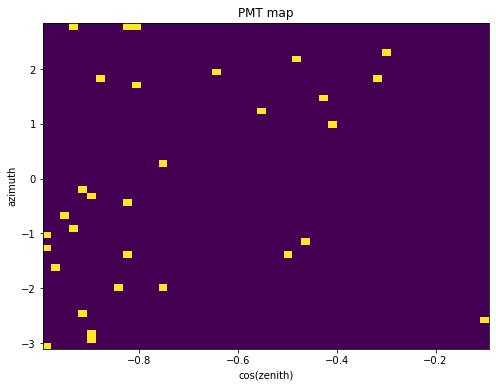

In [ ]:
#%matplotlib

plt.figure(figsize=(8,6))
plt.hist2d(x = np.cos(zenit_1+pi/2), y = azimut_1, bins = [50,50], density = True)
plt.ylabel('azimuth')
plt.xlabel('cos(zenith)')
plt.title('PMT map')
#plt.colorbar()
plt.show()

### 3D Plot hit_types for this event

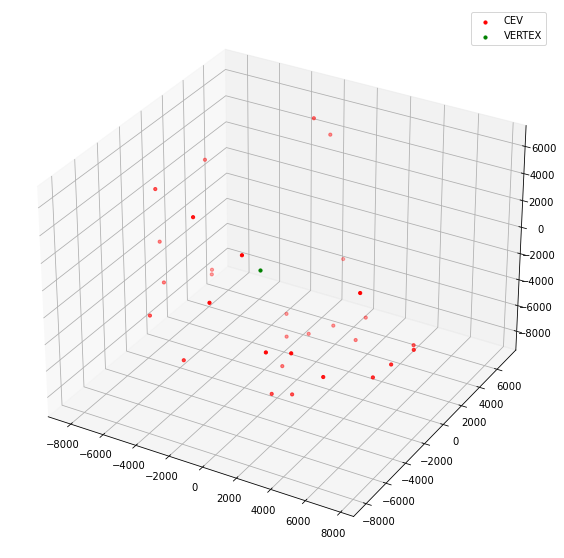

In [ ]:
#cev
x_hit_1 = array(hit_type_1_coord['x'])
y_hit_1 = array(hit_type_1_coord['y'])
z_hit_1 = array(hit_type_1_coord['z'])

#scint
x_hit_2 = array(hit_type_2_coord['x'])
y_hit_2 = array(hit_type_2_coord['y'])
z_hit_2 = array(hit_type_2_coord['z'])

#event generation
x_ev = vertex_coord[0]
y_ev = vertex_coord[1]
z_ev = vertex_coord[2]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_hit_1, y_hit_1, z_hit_1, c = 'r', s = 10, label = 'CEV')
#ax.scatter(x_hit_2, y_hit_2, z_hit_2, c = 'b', s = 10, label = 'SCINT')
ax.scatter(x_ev, y_ev, z_ev, c = 'g', s = 10, label = 'VERTEX')
plt.legend()

plt.show()

### Lets see the xy plane

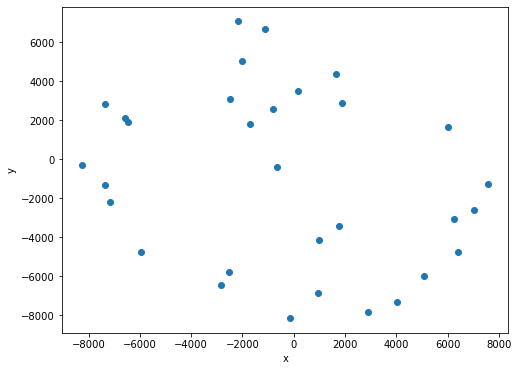

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_hit_1, y_hit_1)
plt.ylabel('y')
plt.xlabel('x')
#plt.title('PMT map')

plt.show()

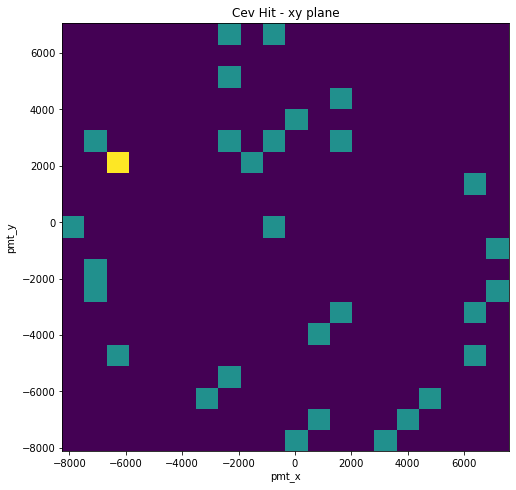

In [ ]:
plt.figure(figsize=(8,8))
plt.hist2d(x = x_hit_1, y = y_hit_1, bins = [20,20], density = True)
plt.ylabel('pmt_y')
plt.xlabel('pmt_x')
plt.title('Cev Hit - xy plane')

#equal acis ration
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.show()